<a href="https://colab.research.google.com/github/NeeteshMalik/NeeteshMalik/blob/main/Animal_Purchase_Price_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection And Processing

In [2]:
#loading the data from xlsx file to pandas dataframe
animal_dataset = pd.read_excel('/content/Animall Dataset.xlsx')


In [3]:
#inspecting the first 5 rows of the dataframe
animal_dataset.head()

,Serial_No,Pashu_Type,Breed,Height_in_PR,Age_of_pashu,Age_of_Pashu_In_Years,Byat,Current_Milk_in_PR_In_Kg,Milk_on_tool_In_Kg,Maximum_Milk_Capacity_In_Kg,Milk_in_last_byaat_In_Kg,Calf_Sex,Base_Price_on_Tool
0,1,BUFFALO,MURRAH CROSS,4.8,6,6,3 Byat,11,10,15,12,Female,98000
1,2,BUFFALO,MURRAH CROSS,4.8,5,5,2 Byat,10,9,16,14,Male,95000
2,3,BUFFALO,MURRAH CROSS,4.6,5,5,2 Byat,10,9,14,12,Female,100000
3,4,BUFFALO,MURRAH CROSS,4.8,5,5,2 Byat,10,9,14,10,Female,95000
4,5,BUFFALO,MURRAH CROSS,4.7,5,5,3 Byat,13,12,14,12,Female,115000


In [4]:
#Checking the number of rows and columns
animal_dataset.shape

(177, 13)

In [5]:
#Getting Some Information About The Dataset
animal_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Serial_No                    177 non-null    int64  
 1   Pashu_Type                   177 non-null    object 
 2   Breed                        177 non-null    object 
 3   Height_in_PR                 177 non-null    float64
 4   Age_of_pashu                 177 non-null    int64  
 5   Age_of_Pashu_In_Years        177 non-null    int64  
 6   Byat                         177 non-null    object 
 7   Current_Milk_in_PR_In_Kg     177 non-null    int64  
 8   Milk_on_tool_In_Kg           177 non-null    int64  
 9   Maximum_Milk_Capacity_In_Kg  177 non-null    int64  
 10  Milk_in_last_byaat_In_Kg     177 non-null    int64  
 11  Calf_Sex                     177 non-null    object 
 12  Base_Price_on_Tool           177 non-null    int64  
dtypes: float64(1), int64

In [6]:
#Checking the number of Missing Values
animal_dataset.isnull().sum()

Serial_No                      0
Pashu_Type                     0
Breed                          0
Height_in_PR                   0
Age_of_pashu                   0
Age_of_Pashu_In_Years          0
Byat                           0
Current_Milk_in_PR_In_Kg       0
Milk_on_tool_In_Kg             0
Maximum_Milk_Capacity_In_Kg    0
Milk_in_last_byaat_In_Kg       0
Calf_Sex                       0
Base_Price_on_Tool             0
dtype: int64

In [7]:
#Checking the Distribution of Categorical Data
print(animal_dataset.Byat.value_counts())
print(animal_dataset.Breed.value_counts())
print(animal_dataset.Age_of_Pashu_In_Years.value_counts())
print(animal_dataset.Calf_Sex.value_counts())

2 Byat           85
3 Byat           64
4 Byat           22
1 Byat            5
Not Aplicable     1
Name: Byat, dtype: int64
MURRAH CROSS    107
MURRAH           70
Name: Breed, dtype: int64
5    74
7    50
8    19
4    18
6    13
9     1
2     1
0     1
Name: Age_of_Pashu_In_Years, dtype: int64
MALE             84
FEMALE           74
Female            9
Male              9
Not Aplicable     1
Name: Calf_Sex, dtype: int64


Encoding the Categorical Data

In [8]:
#Encoding the "Byat" and "Breed" Column as Machine Learning Model Won't Understand the Text Efficiently
animal_dataset.replace({'Byat':{'Not Aplicable':0,'1 Byat':1,'2 Byat':2,'3 Byat':3,'4 Byat':4}},inplace=True)
animal_dataset.replace({'Breed':{'MURRAH':0,'MURRAH CROSS':1}},inplace=True)
animal_dataset.replace({'Calf_Sex':{'Male':0,'Female':1,'MALE':0,'FEMALE':1,'Not Aplicable':2}},inplace=True)

In [68]:
animal_dataset.head()

,Serial_No,Pashu_Type,Breed,Height_in_PR,Age_of_pashu,Age_of_Pashu_In_Years,Byat,Current_Milk_in_PR_In_Kg,Milk_on_tool_In_Kg,Maximum_Milk_Capacity_In_Kg,Milk_in_last_byaat_In_Kg,Calf_Sex,Base_Price_on_Tool
0,1,BUFFALO,1,4.8,6.0,6,3,11.0,10,15.0,12.0,1,98000
1,2,BUFFALO,1,4.8,5.0,5,2,10.0,9,16.0,14.0,0,95000
2,3,BUFFALO,1,4.6,5.0,5,2,10.0,9,14.0,12.0,1,100000
3,4,BUFFALO,1,4.8,5.0,5,2,10.0,9,14.0,10.0,1,95000
4,5,BUFFALO,1,4.7,5.0,5,3,13.0,12,14.0,12.0,1,115000


Splitting the Data And Target

In [9]:
X = animal_dataset.drop(['Pashu_Type','Base_Price_on_Tool'],axis=1)
Y = animal_dataset['Base_Price_on_Tool']

In [70]:
print(X)

     Serial_No  Breed  Height_in_PR  Age_of_pashu  Age_of_Pashu_In_Years  \
0            1      1           4.8           6.0                      6   
1            2      1           4.8           5.0                      5   
2            3      1           4.6           5.0                      5   
3            4      1           4.8           5.0                      5   
4            5      1           4.7           5.0                      5   
..         ...    ...           ...           ...                    ...   
172        173      0           4.5          60.0                      5   
173        174      0           4.5          60.0                      5   
174        175      1           4.5          48.0                      4   
175        176      0           4.9          48.0                      4   
176        177      0           4.5          60.0                      5   

     Byat  Current_Milk_in_PR_In_Kg  Milk_on_tool_In_Kg  \
0       3                   

In [10]:
print(Y)

0       98000
1       95000
2      100000
3       95000
4      115000
        ...  
172     98000
173     87000
174     89000
175     92000
176    102000
Name: Base_Price_on_Tool, Length: 177, dtype: int64


Splitting Training And Test Data

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1, random_state=2)

Model Training

1.Linear Regression


In [22]:
#Loading The Linear Regression Model
lin_reg_model = LinearRegression()

In [15]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [16]:
#Prediction On Training Data
training_data_prediction = lin_reg_model.predict(X_train)

In [17]:
#Comparing the Values Predicted By Our Model Vs The Actual Values Using R Squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R Squared Error : " , error_score)


R Squared Error :  0.24049117858811686


Visualize the Actual Prices And The Predicted Prices


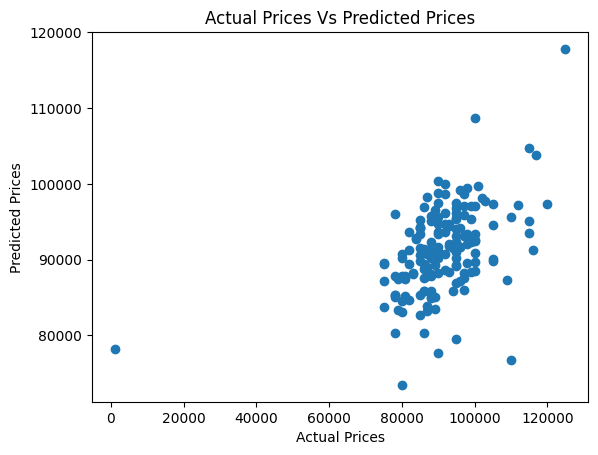

In [18]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()

In [19]:
#Prediction On Testing Data
testing_data_prediction = lin_reg_model.predict(X_test)

In [20]:
#Comparing the Values Predicted By Our Model For The Testing Data Vs The Actual Values Using R Squared Error
error_score = metrics.r2_score(Y_test,testing_data_prediction)
print("R Squared Error : " , error_score)

R Squared Error :  0.18005797953768155


Visualizing The Test Data Vs Actual Data

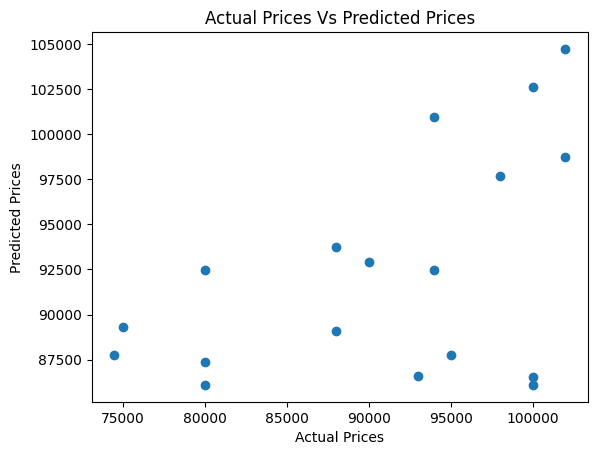

In [21]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()

2. Lasso Regression

In [23]:
#Loading The Lasso Regression Model
lass_reg_model = Lasso()

In [24]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [25]:
#Prediction On Training Data
training_data_prediction = lass_reg_model.predict(X_train)

In [26]:
#Comparing the Values Predicted By Our Model Vs The Actual Values Using R Squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R Squared Error : " , error_score)


R Squared Error :  0.2404903505540964


Visualize the Actual Prices And The Predicted Prices


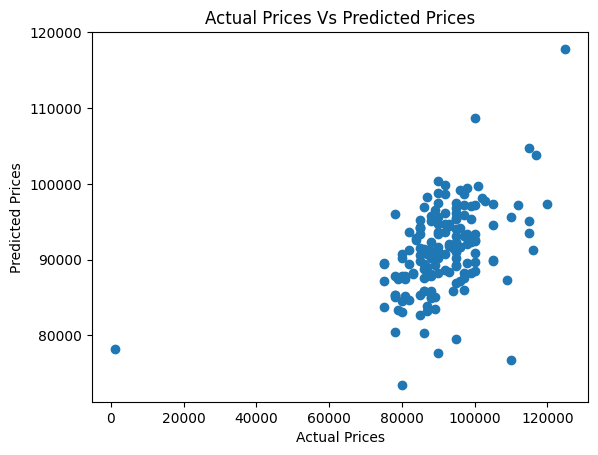

In [27]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()

In [28]:
#Prediction On Testing Data
testing_data_prediction = lass_reg_model.predict(X_test)

In [29]:
#Comparing the Values Predicted By Our Model For The Testing Data Vs The Actual Values Using R Squared Error
error_score = metrics.r2_score(Y_test,testing_data_prediction)
print("R Squared Error : " , error_score)

R Squared Error :  0.18050748950355655


Visualizing The Test Data Vs Actual Data

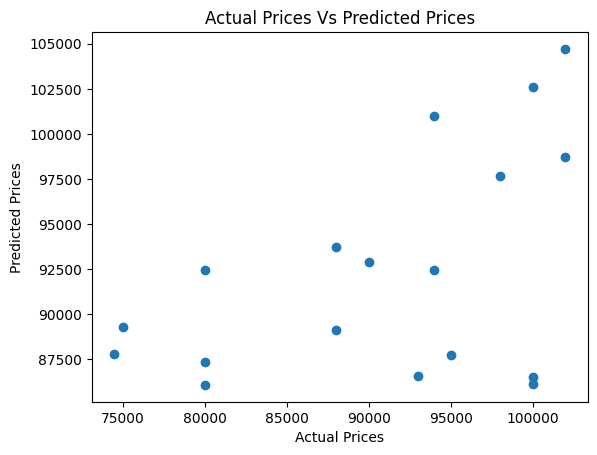

In [30]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()